In [1]:
import numpy as np
import pandas as pd

In [2]:
dataframe = pd.read_csv('fer2013.csv')
dataframe

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [3]:
# Separate de data as input and output

x_train_ps = dataframe["pixels"].to_numpy()
y_train_ps = dataframe["emotion"].to_numpy()


In [4]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)


def process_input(panda_dataframe):
    x = np.empty(shape=(len(panda_dataframe), 48, 48))
    i = 0
    for line in panda_dataframe:
        arranged_line = np.fromstring(line, dtype=int, sep=' ').reshape((48, 48)) / 255
        if i != 0:
            x[i] = arranged_line
        else:
            x[i] = arranged_line    
        i = i + 1
        update_progress(i / len(panda_dataframe))
    return x


def process_output(panda_dataframe):
    x = np.zeros([len(panda_dataframe),7])
    i = 0
    for line in panda_dataframe:
        x[i][line] = 1.0
        i = i + 1
        update_progress(i / len(panda_dataframe))
    return x


In [5]:
faces = process_input(x_train_ps)
emotions = process_output(y_train_ps)

Progress: [####################] 100.0%


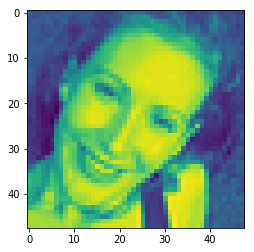

In [11]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(faces[553])

np.save('faces', faces)
np.save('emotions', emotions)


In [12]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

# parameters
batch_size = 32
num_epochs = 1000
input_shape = (48, 48,1)
validation_split = .2
verbose = 1
num_classes = 7
patience = 50

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                        name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))




In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
activation_5 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 16)        0         
__________

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(faces, emotions,test_size=0.2,shuffle=True)

x_train = x_train.reshape(len(x_train),48,48,1)   #Reshape for CNN
x_test = x_test.reshape(len(x_test),48,48,1)



data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)




model.fit_generator(data_generator.flow(x_train, y_train,
                                            batch_size),
        epochs = num_epochs,steps_per_epoch= int(len(x_train) / batch_size), 
        validation_data = (x_test,y_test),
        validation_steps = int(len(x_test) / batch_size) )

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
897/897 [==============================] - 31s 34ms/step - loss: 1.7694 - acc: 0.2893 - val_loss: 1.6943 - val_acc: 0.3193
Epoch 2/1000
897/897 [==============================] - 19s 21ms/step - loss: 1.6365 - acc: 0.3531 - val_loss: 1.5549 - val_acc: 0.3732
Epoch 3/1000
897/897 [==============================] - 19s 21ms/step - loss: 1.5761 - acc: 0.3817 - val_loss: 1.5459 - val_acc: 0.3973
Epoch 4/1000
897/897 [==============================] - 19s 21ms/step - loss: 1.5301 - acc: 0.3995 - val_loss: 1.3989 - val_acc: 0.4505
Epoch 5/1000
897/897 [==============================] - 19s 21ms/step - loss: 1.4864 - acc: 0.4206 - val_loss: 1.3911 - val_acc: 0.4597
Epoch 6/1000
897/897 [==============================] - 19s 21ms/step - loss: 1.4559 - acc: 0.4327 - val_loss: 1.3367 - val_acc: 0.4960
Epoch 7/1000
897/897 [==============================] - 19s 21ms/step - loss: 1.4309 - acc: 0.4475 - val_loss: 1.3077 - val_acc: 0.4965


Epoch 59/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.2312 - acc: 0.5331 - val_loss: 1.0868 - val_acc: 0.5861
Epoch 60/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.2256 - acc: 0.5328 - val_loss: 1.0883 - val_acc: 0.5809
Epoch 61/1000
897/897 [==============================] - 19s 21ms/step - loss: 1.2333 - acc: 0.5311 - val_loss: 1.0758 - val_acc: 0.5928
Epoch 62/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.2224 - acc: 0.5356 - val_loss: 1.0940 - val_acc: 0.5899
Epoch 63/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.2261 - acc: 0.5335 - val_loss: 1.0729 - val_acc: 0.5917
Epoch 64/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.2261 - acc: 0.5345 - val_loss: 1.0789 - val_acc: 0.5883
Epoch 65/1000
897/897 [==============================] - 19s 22ms/step - loss: 1.2214 - acc: 0.5352 - val_loss: 1.0561 - val_acc: 0.5989
Epoch 66/1000
897/897 [==================

897/897 [==============================] - 19s 21ms/step - loss: 1.1907 - acc: 0.5475 - val_loss: 1.0223 - val_acc: 0.6177
Epoch 119/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1845 - acc: 0.5527 - val_loss: 1.0480 - val_acc: 0.6064
Epoch 120/1000
897/897 [==============================] - 20s 23ms/step - loss: 1.1931 - acc: 0.5490 - val_loss: 1.0346 - val_acc: 0.6106
Epoch 121/1000
897/897 [==============================] - 20s 23ms/step - loss: 1.1904 - acc: 0.5485 - val_loss: 1.0365 - val_acc: 0.6110
Epoch 122/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1872 - acc: 0.5511 - val_loss: 1.0864 - val_acc: 0.5913
Epoch 123/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1890 - acc: 0.5474 - val_loss: 1.0300 - val_acc: 0.6144
Epoch 124/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1862 - acc: 0.5515 - val_loss: 1.0328 - val_acc: 0.6112
Epoch 125/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1692 - acc: 0.5554 - val_loss: 1.0104 - val_acc: 0.6156
Epoch 178/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1631 - acc: 0.5601 - val_loss: 1.0196 - val_acc: 0.6124
Epoch 179/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1712 - acc: 0.5567 - val_loss: 1.0112 - val_acc: 0.6167
Epoch 180/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1687 - acc: 0.5563 - val_loss: 1.0163 - val_acc: 0.6223
Epoch 181/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1723 - acc: 0.5542 - val_loss: 1.0174 - val_acc: 0.6155
Epoch 182/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1696 - acc: 0.5580 - val_loss: 1.0123 - val_acc: 0.6149
Epoch 183/1000
897/897 [==============================] - 20s 23ms/step - loss: 1.1669 - acc: 0.5578 - val_loss: 1.0088 - val_acc: 0.6218
Epoch 184/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1537 - acc: 0.5610 - val_loss: 1.0058 - val_acc: 0.6212
Epoch 237/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1544 - acc: 0.5645 - val_loss: 0.9946 - val_acc: 0.6258
Epoch 238/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1583 - acc: 0.5620 - val_loss: 0.9954 - val_acc: 0.6234
Epoch 239/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1571 - acc: 0.5596 - val_loss: 1.0034 - val_acc: 0.6197
Epoch 240/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1505 - acc: 0.5632 - val_loss: 1.0045 - val_acc: 0.6204
Epoch 241/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1582 - acc: 0.5590 - val_loss: 0.9938 - val_acc: 0.6278
Epoch 242/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1585 - acc: 0.5604 - val_loss: 0.9997 - val_acc: 0.6254
Epoch 243/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1456 - acc: 0.5677 - val_loss: 1.0135 - val_acc: 0.6191
Epoch 296/1000
897/897 [==============================] - 20s 23ms/step - loss: 1.1459 - acc: 0.5627 - val_loss: 1.0001 - val_acc: 0.6220
Epoch 297/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1495 - acc: 0.5626 - val_loss: 0.9936 - val_acc: 0.6262
Epoch 298/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1424 - acc: 0.5657 - val_loss: 1.0004 - val_acc: 0.6212
Epoch 299/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1428 - acc: 0.5677 - val_loss: 1.0023 - val_acc: 0.6211
Epoch 300/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1514 - acc: 0.5627 - val_loss: 0.9898 - val_acc: 0.6278
Epoch 301/1000
897/897 [==============================] - 20s 23ms/step - loss: 1.1445 - acc: 0.5649 - val_loss: 0.9873 - val_acc: 0.6251
Epoch 302/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1410 - acc: 0.5648 - val_loss: 0.9919 - val_acc: 0.6297
Epoch 355/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1350 - acc: 0.5684 - val_loss: 0.9822 - val_acc: 0.6330
Epoch 356/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1374 - acc: 0.5659 - val_loss: 0.9924 - val_acc: 0.6236
Epoch 357/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1355 - acc: 0.5690 - val_loss: 0.9825 - val_acc: 0.6301
Epoch 358/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1409 - acc: 0.5672 - val_loss: 0.9707 - val_acc: 0.6379
Epoch 359/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1394 - acc: 0.5683 - val_loss: 0.9804 - val_acc: 0.6305
Epoch 360/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1364 - acc: 0.5660 - val_loss: 0.9894 - val_acc: 0.6291
Epoch 361/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1305 - acc: 0.5743 - val_loss: 0.9817 - val_acc: 0.6257
Epoch 414/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1251 - acc: 0.5718 - val_loss: 0.9797 - val_acc: 0.6323
Epoch 415/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1344 - acc: 0.5676 - val_loss: 0.9776 - val_acc: 0.6290
Epoch 416/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1330 - acc: 0.5679 - val_loss: 0.9966 - val_acc: 0.6198
Epoch 417/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1371 - acc: 0.5683 - val_loss: 0.9749 - val_acc: 0.6310
Epoch 418/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1337 - acc: 0.5706 - val_loss: 0.9781 - val_acc: 0.6297
Epoch 419/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1403 - acc: 0.5651 - val_loss: 0.9852 - val_acc: 0.6278
Epoch 420/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1300 - acc: 0.5727 - val_loss: 0.9652 - val_acc: 0.6357
Epoch 473/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1272 - acc: 0.5707 - val_loss: 0.9890 - val_acc: 0.6283
Epoch 474/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1213 - acc: 0.5749 - val_loss: 0.9760 - val_acc: 0.6323
Epoch 475/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1249 - acc: 0.5738 - val_loss: 0.9865 - val_acc: 0.6307
Epoch 476/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1267 - acc: 0.5743 - val_loss: 0.9794 - val_acc: 0.6329
Epoch 477/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1346 - acc: 0.5713 - val_loss: 0.9730 - val_acc: 0.6332
Epoch 478/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1262 - acc: 0.5736 - val_loss: 0.9798 - val_acc: 0.6255
Epoch 479/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1205 - acc: 0.5765 - val_loss: 0.9750 - val_acc: 0.6314
Epoch 532/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1230 - acc: 0.5744 - val_loss: 0.9705 - val_acc: 0.6321
Epoch 533/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1188 - acc: 0.5742 - val_loss: 0.9699 - val_acc: 0.6353
Epoch 534/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1172 - acc: 0.5743 - val_loss: 0.9891 - val_acc: 0.6278
Epoch 535/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1261 - acc: 0.5737 - val_loss: 0.9680 - val_acc: 0.6362
Epoch 536/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1201 - acc: 0.5753 - val_loss: 0.9658 - val_acc: 0.6371
Epoch 537/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1233 - acc: 0.5746 - val_loss: 0.9923 - val_acc: 0.6273
Epoch 538/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1223 - acc: 0.5752 - val_loss: 0.9839 - val_acc: 0.6315
Epoch 591/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1188 - acc: 0.5767 - val_loss: 0.9764 - val_acc: 0.6305
Epoch 592/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1160 - acc: 0.5762 - val_loss: 0.9751 - val_acc: 0.6340
Epoch 593/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1179 - acc: 0.5776 - val_loss: 0.9850 - val_acc: 0.6257
Epoch 594/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1096 - acc: 0.5812 - val_loss: 0.9686 - val_acc: 0.6343
Epoch 595/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1236 - acc: 0.5746 - val_loss: 0.9740 - val_acc: 0.6354
Epoch 596/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1176 - acc: 0.5768 - val_loss: 0.9824 - val_acc: 0.6337
Epoch 597/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1165 - acc: 0.5774 - val_loss: 0.9736 - val_acc: 0.6356
Epoch 650/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1098 - acc: 0.5819 - val_loss: 0.9594 - val_acc: 0.6354
Epoch 651/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1186 - acc: 0.5773 - val_loss: 0.9688 - val_acc: 0.6328
Epoch 652/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1206 - acc: 0.5749 - val_loss: 0.9755 - val_acc: 0.6322
Epoch 653/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1157 - acc: 0.5777 - val_loss: 0.9697 - val_acc: 0.6329
Epoch 654/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1077 - acc: 0.5832 - val_loss: 0.9834 - val_acc: 0.6265
Epoch 655/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1155 - acc: 0.5786 - val_loss: 0.9680 - val_acc: 0.6361
Epoch 656/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1115 - acc: 0.5765 - val_loss: 0.9658 - val_acc: 0.6375
Epoch 709/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1124 - acc: 0.5781 - val_loss: 0.9631 - val_acc: 0.6365
Epoch 710/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1068 - acc: 0.5771 - val_loss: 0.9596 - val_acc: 0.6367
Epoch 711/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1090 - acc: 0.5781 - val_loss: 0.9564 - val_acc: 0.6418
Epoch 712/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1111 - acc: 0.5756 - val_loss: 0.9661 - val_acc: 0.6353
Epoch 713/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1087 - acc: 0.5813 - val_loss: 0.9630 - val_acc: 0.6385
Epoch 714/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1086 - acc: 0.5816 - val_loss: 0.9600 - val_acc: 0.6379
Epoch 715/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1144 - acc: 0.5799 - val_loss: 0.9718 - val_acc: 0.6314
Epoch 768/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1015 - acc: 0.5817 - val_loss: 0.9553 - val_acc: 0.6375
Epoch 769/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1108 - acc: 0.5770 - val_loss: 0.9696 - val_acc: 0.6336
Epoch 770/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1080 - acc: 0.5816 - val_loss: 0.9518 - val_acc: 0.6460
Epoch 771/1000
897/897 [==============================] - 20s 23ms/step - loss: 1.1058 - acc: 0.5787 - val_loss: 0.9621 - val_acc: 0.6351
Epoch 772/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1058 - acc: 0.5823 - val_loss: 0.9695 - val_acc: 0.6364
Epoch 773/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.0978 - acc: 0.5837 - val_loss: 0.9668 - val_acc: 0.6388
Epoch 774/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1095 - acc: 0.5789 - val_loss: 0.9610 - val_acc: 0.6390
Epoch 827/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.0973 - acc: 0.5817 - val_loss: 0.9583 - val_acc: 0.6431
Epoch 828/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1099 - acc: 0.5806 - val_loss: 0.9589 - val_acc: 0.6383
Epoch 829/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.0997 - acc: 0.5845 - val_loss: 0.9586 - val_acc: 0.6443
Epoch 830/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1071 - acc: 0.5816 - val_loss: 0.9671 - val_acc: 0.6376
Epoch 831/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1024 - acc: 0.5805 - val_loss: 0.9577 - val_acc: 0.6404
Epoch 832/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1044 - acc: 0.5831 - val_loss: 0.9666 - val_acc: 0.6393
Epoch 833/1000
897/897 [=========================

897/897 [==============================] - 20s 22ms/step - loss: 1.1047 - acc: 0.5833 - val_loss: 0.9498 - val_acc: 0.6505
Epoch 886/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1042 - acc: 0.5798 - val_loss: 0.9614 - val_acc: 0.6392
Epoch 887/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.0927 - acc: 0.5870 - val_loss: 0.9656 - val_acc: 0.6339
Epoch 888/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.0982 - acc: 0.5870 - val_loss: 0.9640 - val_acc: 0.6383
Epoch 889/1000
897/897 [==============================] - 20s 23ms/step - loss: 1.1043 - acc: 0.5814 - val_loss: 0.9597 - val_acc: 0.6418
Epoch 890/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1078 - acc: 0.5795 - val_loss: 0.9752 - val_acc: 0.6343
Epoch 891/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1040 - acc: 0.5841 - val_loss: 0.9979 - val_acc: 0.6244
Epoch 892/1000
897/897 [=========================

897/897 [==============================] - 20s 23ms/step - loss: 1.1010 - acc: 0.5859 - val_loss: 0.9620 - val_acc: 0.6392
Epoch 945/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1012 - acc: 0.5832 - val_loss: 0.9587 - val_acc: 0.6449
Epoch 946/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.0978 - acc: 0.5872 - val_loss: 0.9619 - val_acc: 0.6397
Epoch 947/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1042 - acc: 0.5835 - val_loss: 0.9651 - val_acc: 0.6396
Epoch 948/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.0993 - acc: 0.5817 - val_loss: 0.9853 - val_acc: 0.6262
Epoch 949/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1007 - acc: 0.5841 - val_loss: 0.9609 - val_acc: 0.6390
Epoch 950/1000
897/897 [==============================] - 20s 22ms/step - loss: 1.1013 - acc: 0.5831 - val_loss: 0.9497 - val_acc: 0.6459
Epoch 951/1000
897/897 [=========================

In [17]:
# Save the model in a file

model.save("emotion_detection_model.h5")